## Use phot-griz environment (updated photutils)

In [1]:
# General imports
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# grizli
from grizli.model import GrismFLT
import grizli

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
direct_file = "ready_direct_{0}".format(root)
seg_file = "seg_{0}".format(root)
seg_cat = "flat_cat_{0}.detect.cat".format(root)

In [2]:
# Instantiate the GrismFLT object
pad = 100
roman_sim = GrismFLT(direct_file=direct_file, seg_file=seg_file, pad=pad)
roman_sim.compute_full_model(mag_limit=28, size=77, compute_size=False)



Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
ready_direct_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / Pad ref HDU with 264 pixels
ready_direct_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / blot segmentation seg_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


Text(0.5, 1.0, 'Simulated Grism Image - Flat Spectra')

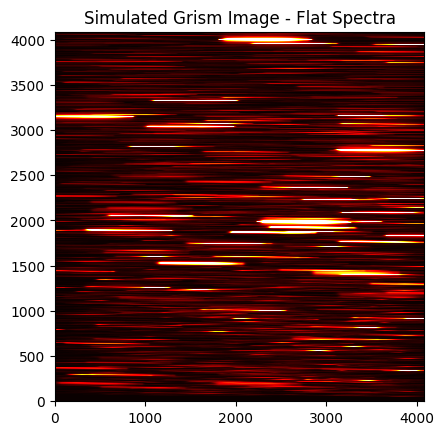

In [3]:
plt.imshow(roman_sim.model[pad:-pad, pad:-pad], vmin=0., vmax=roman_sim.model.max()/100,
           interpolation='Nearest', origin='lower', cmap='hot')

plt.title("Simulated Grism Image - Flat Spectra")

In [4]:
raise Exception("Pause before saving")

Exception: Pause before saving

In [6]:
file = fits.open(direct_file)
header = file[0].header
file.close()

fits.writeto("flat_spectra_{0}".format(root), np.rot90(roman_sim.model[pad:-pad, pad:-pad]), header=header, overwrite=True)